https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time
import pickle

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Raw Dataset

In [4]:
trainset_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Raw/trainset.csv", index_col = 0)
trainset_raw.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",105.0,43.000,440.800000,37263,21134.000,28.3,0.000000,0,39.00,37.0,...,24.785427,0.150038,5.051674,43.921351,8.353222,603,33,2,6,183.2
"McHenry County, Illinois",1192.5,329.875,474.400000,72741,153227.875,6.9,0.000000,8,39.30,38.2,...,1.345992,2.633745,2.641228,61.798687,4.286142,948,13,0,0,181.4
"Wichita County, Kansas",1192.5,6.000,453.549422,53447,2157.000,11.5,0.000000,6,35.70,34.5,...,0.000000,0.317604,2.903811,57.490397,7.061503,1614,16,0,7,177.6
"Mineral County, Montana",35.0,12.000,538.800000,36449,4251.000,17.3,0.000000,0,53.55,51.9,...,0.070788,0.165172,0.141576,46.769034,3.333333,984,26,3,3,188.8
"Ohio County, West Virginia",308.0,123.000,500.900000,40195,43066.000,18.4,209.768024,1,43.30,41.3,...,4.152439,0.850196,0.288746,42.926988,3.257227,1085,48,2,6,184.4


In [5]:
valset_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Raw/valset.csv", index_col = 0)
valset_raw.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",675.0,273,477.4,44358,120547.0,19.1,8.295520,3,39.50,38.8,...,0.437922,1.223828,1.237276,51.807095,4.659173,186.5,139,32,3,5
"Champaign County, Illinois",781.0,267,450.2,47966,169831.5,22.6,201.766857,4,29.30,28.2,...,12.588086,2.628022,0.978296,39.728702,3.467191,152.5,40,8,0,0
"Saratoga County, New York",1113.5,354,508.7,71885,169831.5,7.2,26.519454,8,41.80,40.9,...,1.611447,2.372930,0.393254,52.770765,4.520914,174.2,228,27,1,2
"Montmorency County, Michigan",88.0,37,484.4,37961,9259.0,15.7,0.000000,1,52.35,50.7,...,0.361664,0.000000,0.340389,49.213759,3.263086,207.6,172,17,0,0
"Barrow County, Georgia",281.0,114,457.7,49698,75370.0,13.0,0.000000,5,34.80,32.9,...,11.578626,2.628022,1.976060,55.195246,5.318187,192.0,8,6,2,6


In [6]:
testset_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Raw/testset.csv", index_col = 0)
testset_raw.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",675.0,273,477.4,44358,120547.0,19.1,8.295520,3,39.50,38.8,...,0.437922,1.223828,1.237276,51.807095,4.659173,186.5,139,32,3,5
"Champaign County, Illinois",781.0,267,450.2,47966,169831.5,22.6,201.766857,4,29.30,28.2,...,12.588086,2.628022,0.978296,39.728702,3.467191,152.5,40,8,0,0
"Saratoga County, New York",1113.5,354,508.7,71885,169831.5,7.2,26.519454,8,41.80,40.9,...,1.611447,2.372930,0.393254,52.770765,4.520914,174.2,228,27,1,2
"Montmorency County, Michigan",88.0,37,484.4,37961,9259.0,15.7,0.000000,1,52.35,50.7,...,0.361664,0.000000,0.340389,49.213759,3.263086,207.6,172,17,0,0
"Barrow County, Georgia",281.0,114,457.7,49698,75370.0,13.0,0.000000,5,34.80,32.9,...,11.578626,2.628022,1.976060,55.195246,5.318187,192.0,8,6,2,6


In [7]:
X_train_raw = trainset_raw.drop(['TARGET_deathRate'], axis = 1)
y_train_raw = trainset_raw['TARGET_deathRate']

In [8]:
X_val_raw = valset_raw.drop(['TARGET_deathRate'], axis = 1)
y_val_raw = valset_raw['TARGET_deathRate']

In [9]:
X_test_raw = testset_raw.drop(['TARGET_deathRate'], axis = 1)
y_test_raw = testset_raw['TARGET_deathRate']

# Min Max Dataset

In [10]:
trainset_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainset.csv", index_col = 0)
trainset_minmax.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",0.083439,0.122371,0.291870,0.133236,0.846543,0.0,0.5344,0,0.494915,0.592934,...,0.055978,1.000000,0.478172,0.891040,0.407456,603,33,2,6,0.648195
"McHenry County, Illinois",1.000000,1.000000,1.000000,1.000000,0.124789,0.0,0.5440,8,0.535593,0.549923,...,0.982636,0.522842,0.886624,0.457204,0.401518,948,13,0,0,0.739132
"Wichita County, Kansas",1.000000,0.009178,0.614898,0.008714,0.279933,0.0,0.4288,6,0.410169,0.559140,...,0.118496,0.574822,0.788191,0.753252,0.388981,1614,16,0,7,0.682701
"Mineral County, Montana",0.024442,0.027533,0.275623,0.022454,0.475548,0.0,1.0000,0,1.000000,0.872504,...,0.061625,0.028026,0.543234,0.355567,0.425932,984,26,3,3,0.913427
"Ohio County, West Virginia",0.254530,0.367113,0.350392,0.277148,0.512648,1.0,0.6720,1,0.640678,0.700461,...,0.317203,0.057158,0.455453,0.347449,0.411415,1085,48,2,6,0.810853


In [11]:
valset_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/valset.csv", index_col = 0)
valset_minmax.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",0.563843,0.826004,0.433484,0.785557,0.536256,0.039546,0.5504,3,0.555932,0.556068,...,0.456603,0.244924,0.658341,0.496995,0.418344,0.747251,139,32,3,5
"Champaign County, Illinois",0.653182,0.807648,0.505499,1.108948,0.654300,0.961857,0.2240,4,0.196610,0.258065,...,0.980500,0.193658,0.382380,0.369846,0.306170,0.673636,40,8,0,0
"Saratoga County, New York",0.933418,1.073805,0.982915,1.108948,0.134907,0.126423,0.6240,8,0.627119,0.632873,...,0.885327,0.077846,0.680359,0.482247,0.377763,0.831963,228,27,1,2
"Montmorency County, Michigan",0.069111,0.104015,0.305802,0.055315,0.421585,0.000000,0.9616,1,0.959322,0.987711,...,0.000000,0.067381,0.599090,0.348074,0.487958,0.766196,172,17,0,0
"Barrow County, Georgia",0.231774,0.339579,0.540069,0.489118,0.330523,0.000000,0.4000,5,0.355932,0.427035,...,0.980500,0.391169,0.735752,0.567292,0.436490,0.693934,8,6,2,6


In [12]:
testset_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/testset.csv", index_col = 0)
testset_minmax.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",0.563843,0.826004,0.433484,0.785557,0.536256,0.039546,0.5504,3,0.555932,0.556068,...,0.456603,0.244924,0.658341,0.496995,0.418344,0.747251,139,32,3,5
"Champaign County, Illinois",0.653182,0.807648,0.505499,1.108948,0.654300,0.961857,0.2240,4,0.196610,0.258065,...,0.980500,0.193658,0.382380,0.369846,0.306170,0.673636,40,8,0,0
"Saratoga County, New York",0.933418,1.073805,0.982915,1.108948,0.134907,0.126423,0.6240,8,0.627119,0.632873,...,0.885327,0.077846,0.680359,0.482247,0.377763,0.831963,228,27,1,2
"Montmorency County, Michigan",0.069111,0.104015,0.305802,0.055315,0.421585,0.000000,0.9616,1,0.959322,0.987711,...,0.000000,0.067381,0.599090,0.348074,0.487958,0.766196,172,17,0,0
"Barrow County, Georgia",0.231774,0.339579,0.540069,0.489118,0.330523,0.000000,0.4000,5,0.355932,0.427035,...,0.980500,0.391169,0.735752,0.567292,0.436490,0.693934,8,6,2,6


In [13]:
X_train_minmax = trainset_minmax.drop(['TARGET_deathRate'], axis = 1)
y_train_minmax = trainset_minmax['TARGET_deathRate']

In [14]:
X_val_minmax = valset_minmax.drop(['TARGET_deathRate'], axis = 1)
y_val_minmax = valset_minmax['TARGET_deathRate']

In [15]:
X_test_minmax = testset_minmax.drop(['TARGET_deathRate'], axis = 1)
y_test_minmax = testset_minmax['TARGET_deathRate']

In [16]:
import joblib
scaler_single_filename = "/content/drive/My Drive/DataMining/POC/LungCancer/Model/Scaler/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

# Compare

In [17]:
evaluation_basic_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Evaluation/Raw/basic.csv")
evaluation_basic_raw.rename(columns = {'Unnamed: 0':'model'}, inplace = True)
evaluation_basic_raw["type_1"] = "Raw"
evaluation_basic_raw["type_2"] = "basic"
evaluation_basic_raw.head(5)

,model,mse,mae,rmse,r2,deviation,type_1,type_2
0,Linear Regression,333.886574,13.991826,18.272563,0.327839,0.080978,Raw,basic
1,Support Vector Regression,551.118317,18.478895,23.475909,-5.853417,0.106958,Raw,basic
2,Decision Tree Regression,753.956820,20.606230,27.458274,0.157881,0.118546,Raw,basic
3,Random Forest Regression,324.180913,13.689643,18.005025,0.273986,0.079200,Raw,basic
4,XGBoost Regression,292.321678,13.147758,17.097417,0.456422,0.075626,Raw,basic


In [18]:
evaluation_optuna_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Evaluation/Raw/optuna.csv")
evaluation_optuna_raw.rename(columns = {'Unnamed: 0':'model'}, inplace = True)
evaluation_optuna_raw["type_1"] = "Raw"
evaluation_optuna_raw["type_2"] = "optuna"
evaluation_optuna_raw.head(5)

,model,mse,mae,rmse,r2,deviation,type_1,type_2
0,Linear Regression,321.958409,13.794004,17.943200,3.680029e-01,0.079899,Raw,optuna
1,Neural Network,737.860305,21.449420,27.163584,-3.169086e+12,0.122417,Raw,optuna
2,Decision Tree Regression,747.986131,20.882951,27.349335,3.732183e-02,0.118139,Raw,optuna
3,Random Forest Regression,306.613763,13.278531,17.510390,2.438840e-01,0.077327,Raw,optuna
4,XGBoost Regression,350.161609,14.337592,18.712606,2.046431e-01,0.081803,Raw,optuna


In [19]:
evaluation_basic_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Evaluation/Transform/basic.csv")
evaluation_basic_minmax.rename(columns = {'Unnamed: 0':'model'}, inplace = True)
evaluation_basic_minmax["type_1"] = "Transform"
evaluation_basic_minmax["type_2"] = "basic"
evaluation_basic_minmax.head(5)

,model,mse,mae,rmse,r2,deviation,type_1,type_2
0,Linear Regression,1187.548194,26.299447,34.460821,-0.834144,0.103238,Transform,basic
1,Support Vector Regression,1748.935696,31.832762,41.820279,-275.204733,0.121964,Transform,basic
2,Decision Tree Regression,1835.811543,31.440987,42.846371,-0.087192,0.127314,Transform,basic
3,Random Forest Regression,981.536797,24.101790,31.329488,-0.601247,0.094005,Transform,basic
4,XGBoost Regression,960.449311,23.753924,30.991117,-0.046410,0.093049,Transform,basic


In [20]:
evaluation_optuna_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Evaluation/Transform/optuna.csv")
evaluation_optuna_minmax.rename(columns = {'Unnamed: 0':'model'}, inplace = True)
evaluation_optuna_minmax["type_1"] = "Transform"
evaluation_optuna_minmax["type_2"] = "optuna"
evaluation_optuna_minmax.head(5)

,model,mse,mae,rmse,r2,deviation,type_1,type_2
0,Linear Regression,1187.548194,26.299447,34.460821,-0.834144,0.103238,Transform,optuna
1,Neural Network,1745.006254,32.568287,41.773272,-12.213024,0.131150,Transform,optuna
2,Decision Tree Regression,2548.824004,37.377926,50.485879,-0.188115,0.151101,Transform,optuna
3,Random Forest Regression,984.697037,23.789021,31.379883,-0.628093,0.092841,Transform,optuna
4,XGBoost Regression,1010.193288,24.305385,31.783538,-0.793536,0.094820,Transform,optuna


In [21]:
evaluation = evaluation_basic_raw.copy()
evaluation = evaluation.append(evaluation_optuna_raw, ignore_index = True)
evaluation = evaluation.append(evaluation_basic_minmax, ignore_index = True)
evaluation = evaluation.append(evaluation_optuna_minmax, ignore_index = True)
evaluation

,model,mse,mae,rmse,r2,deviation,type_1,type_2
0,Linear Regression,333.886574,13.991826,18.272563,3.278389e-01,0.080978,Raw,basic
1,Support Vector Regression,551.118317,18.478895,23.475909,-5.853417e+00,0.106958,Raw,basic
2,Decision Tree Regression,753.956820,20.606230,27.458274,1.578809e-01,0.118546,Raw,basic
3,Random Forest Regression,324.180913,13.689643,18.005025,2.739864e-01,0.079200,Raw,basic
4,XGBoost Regression,292.321678,13.147758,17.097417,4.564223e-01,0.075626,Raw,basic
5,Linear Regression,321.958409,13.794004,17.943200,3.680029e-01,0.079899,Raw,optuna
6,Neural Network,737.860305,21.449420,27.163584,-3.169086e+12,0.122417,Raw,optuna
7,Decision Tree Regression,747.986131,20.882951,27.349335,3.732183e-02,0.118139,Raw,optuna
8,Random Forest Regression,306.613763,13.278531,17.510390,2.438840e-01,0.077327,Raw,optuna
9,XGBoost Regression,350.161609,14.337592,18.712606,2.046431e-01,0.081803,Raw,optuna


In [22]:
best_fit_model = evaluation[evaluation['mse']  == evaluation['mse'].min()]
best_fit_model

,model,mse,mae,rmse,r2,deviation,type_1,type_2
4,XGBoost Regression,292.321678,13.147758,17.097417,0.456422,0.075626,Raw,basic


# Create link

In [23]:
link_mod = f'/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Model/{best_fit_model["type_1"].values[0]}/'
link_mod

'/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Model/Raw/'

In [24]:
name_file = ""
if best_fit_model["model"].values[0] =="Linear Regression":
  name_file = name_file+"lr"
elif best_fit_model["model"].values[0] =="Neural Network":
  name_file = name_file+"nn"
elif best_fit_model["model"].values[0] =="Decision Tree Regression":
  name_file = name_file+"dtr"
elif best_fit_model["model"].values[0] =="Random Forest Regression	":
  name_file = name_file+"rfr"
else:
  name_file = name_file+"xgbr"

In [25]:
if best_fit_model["type_2"].values[0] == "basic":
  name_file = name_file + "_Baseline.h5"
else:
  name_file = name_file + "_Optuna.h5"

In [26]:
link_mod = link_mod + name_file
link_mod 

'/content/drive/My Drive/DataMining/POC/LungCancer/RunLocal/Model/Raw/xgbr_Baseline.h5'

In [27]:
from tensorflow.keras.models import load_model

In [28]:
if best_fit_model["model"].values[0] =="Neural Network":
  best_mod = load_model(f'link_mod ')
else:
  best_mod = pickle.load(open(link_mod , 'rb'))

# Feature Selection

In [29]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 18.2 MB/s eta 0:00:00


In [30]:
import shap

In [31]:
explainer = shap.Explainer(best_mod.predict, X_train_raw)

In [32]:
shap_values = explainer(X_train_raw)

Permutation explainer: 2468it [07:59,  5.11it/s]


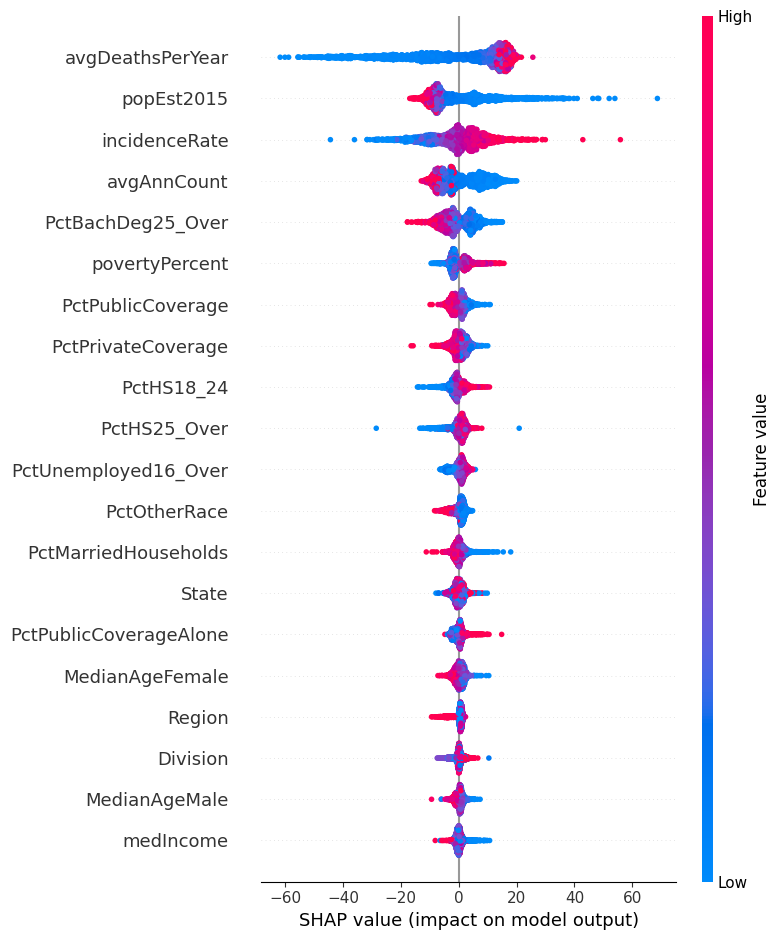

In [33]:
shap.summary_plot(shap_values, X_train_raw)

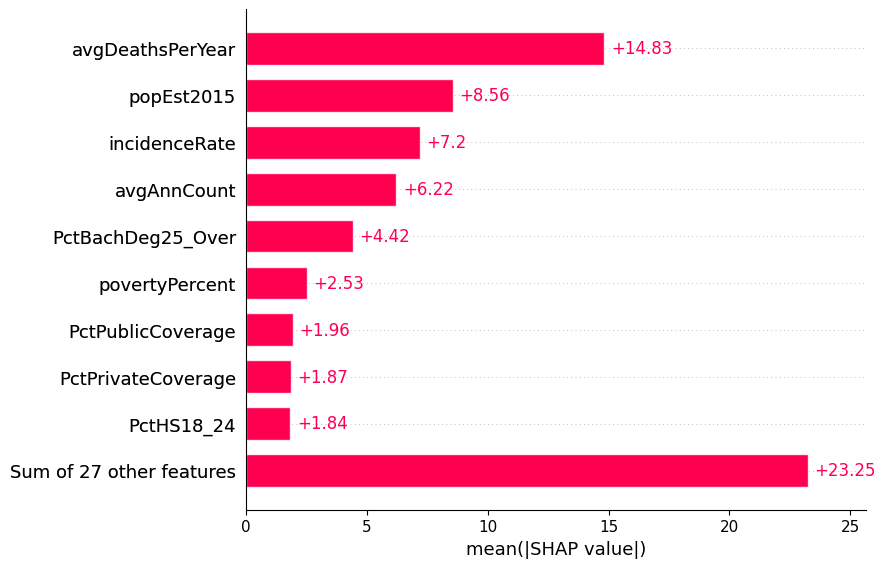

In [34]:
shap.plots.bar(shap_values)

In [35]:
from sklearn.feature_selection import SelectFromModel 

In [36]:
shap_values.base_values

array([178.59848473, 178.59848473, 178.59848473, ..., 178.59848473,
       178.59848473, 178.59848473])

In [37]:
shap_sum = shap_values.values.mean(axis=0)#np.abs(
importance_df = pd.DataFrame([X_train_raw.columns.to_list(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,avgAnnCount,0.503229
21,PctPrivateCoverage,0.287573
30,PctMarriedHouseholds,0.23436
10,MedianAgeFemale,0.1767
3,medIncome,0.171615
5,povertyPercent,0.159193
9,MedianAgeMale,0.141953
8,MedianAge,0.118242
20,PctUnemployed16_Over,0.099191
34,Region,0.09


# Measure

In [38]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [39]:
def deviation_function(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return deviation

In [40]:
def deviation_value(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return np.array(deviation).mean()

# Predict

In [41]:
trainvalset_raw = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Raw/trainvalset.csv", index_col = 0)
trainvalset_raw.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Cumberland County, Maine",1192.5,329.875,479.600000,61436,153227.875,10.8,209.768024,7,41.9,40.3,...,2.659033,2.086544,0.351602,47.825159,3.772834,173.3,379,19,1,4
"Perry County, Kentucky",192.0,93.000,570.787500,31265,27565.000,27.5,209.768024,9,41.4,40.2,...,1.433615,0.559894,0.000000,50.803249,4.955914,280.8,1154,17,2,1
"Camden County, New Jersey",1192.5,329.875,530.900000,61685,153227.875,13.0,209.768024,8,38.3,36.6,...,19.409841,2.680286,5.051674,45.973960,5.434939,182.8,221,30,1,2
"Pinal County, Arizona",1192.5,329.875,330.900000,49876,153227.875,17.6,19.676131,5,37.6,36.9,...,4.606283,1.718441,5.051674,54.212024,5.719536,133.5,1168,2,3,3
"Washington County, Kansas",1192.5,18.000,453.549422,43264,5598.000,10.8,0.000000,3,46.3,44.1,...,0.756243,0.175871,0.281393,57.330057,5.961538,172.4,1577,16,0,7


In [42]:
trainvalset_minmax = pd.read_csv("/content/drive/My Drive/DataMining/POC/LungCancer/Dataset/Transform/trainvalset.csv", index_col = 0)
trainvalset_minmax.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Cumberland County, Maine",1.000000,1.000000,0.774356,1.000000,0.256324,1.000000,0.6272,7,0.606780,0.645161,...,0.778478,0.069601,0.567364,0.402449,0.374794,0.753205,379,19,1,4
"Perry County, Kentucky",0.156764,0.275335,0.172152,0.175434,0.819562,1.000000,0.6112,9,0.603390,0.599078,...,0.208894,0.000000,0.635406,0.528648,0.729462,1.000000,1154,17,2,1
"Camden County, New Jersey",1.000000,1.000000,0.779326,1.000000,0.330523,1.000000,0.5120,8,0.481356,0.546851,...,1.000000,1.000000,0.525069,0.579746,0.406137,0.892046,221,30,1,2
"Pinal County, Arizona",1.000000,1.000000,0.543622,1.000000,0.485666,0.093799,0.4896,5,0.491525,0.497696,...,0.641141,1.000000,0.713288,0.610104,0.243484,0.350756,1168,2,3,3
"Washington County, Kansas",1.000000,0.045889,0.411648,0.031293,0.256324,0.000000,0.7680,3,0.735593,0.801843,...,0.065616,0.055703,0.784527,0.635919,0.371824,0.682701,1577,16,0,7


In [43]:
X_trainval_raw = trainvalset_raw.drop(['TARGET_deathRate'], axis = 1)
y_trainval_raw = trainvalset_raw['TARGET_deathRate']

In [44]:
X_trainval_minmax = trainvalset_minmax.drop(['TARGET_deathRate'], axis = 1)
y_trainval_minmax = trainvalset_minmax['TARGET_deathRate']

In [45]:
if best_fit_model["model"].values[0] =="Neural Network":
  best_mod = best_mod.fit(
                    X_trainval_raw, y_trainval_raw,
                    batch_size=16,
                    epochs=300,
                    validation_split=0.2,
                    verbose=1,
  )
else:
  best_mod = best_mod.fit(X_trainval_raw,y_trainval_raw) 

In [46]:
pred = best_mod.predict(X_test_raw)

# Result

<Axes: xlabel='Deviation', ylabel='Density'>

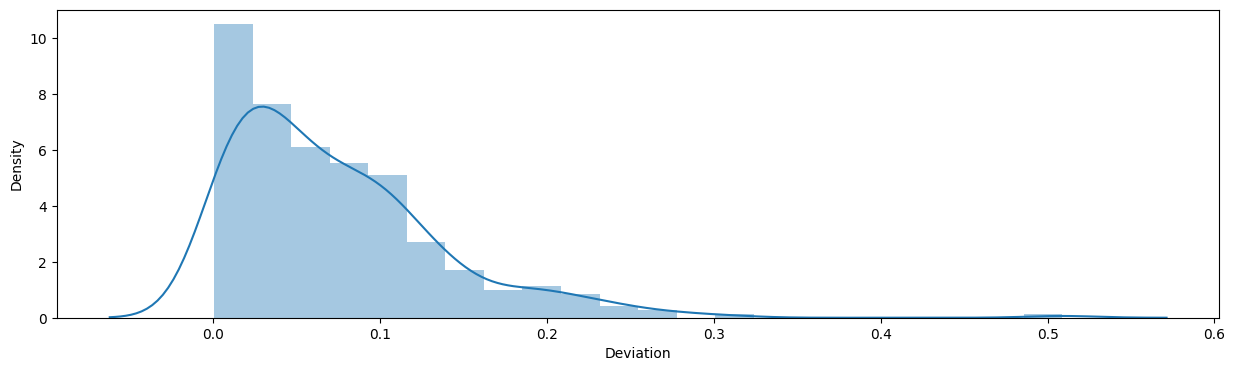

In [47]:
deviation_test = deviation_function(y_test_raw, pred)
dict = {'Actual':y_test_raw,
        'Predict': pred,
        'Deviation':deviation_test}
mod_deviation = pd.DataFrame(dict)
plt.figure(figsize=(15,4))
sns.distplot(mod_deviation.Deviation, label=str(np.round(mod_deviation.Deviation,2)))

In [48]:
#evaluating the model with the following metrics
#mean squared error
mse=mean_squared_error(y_test_raw, pred)     
#mean absolute error     
mae=mean_absolute_error(y_test_raw, pred)  
#root mean squared error      
rmse=np.sqrt(mean_squared_error(y_test_raw, pred))
#r2 score
r2 = r2_score(y_test_raw, pred)
print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'rmse: {rmse}')
print(f"r2_score: {r2}")

mse: 269.8426666381151
mae: 12.67309181588595
rmse: 16.426888525771247
r2_score: 0.6308201426626519


In [49]:
evaluation_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse,  "r2": r2, "deviation": deviation_value(y_test_raw, pred)},index=['XGBoost Regression'])
evaluation_df

,mse,mae,rmse,r2,deviation
XGBoost Regression,269.842667,12.673092,16.426889,0.63082,0.073527


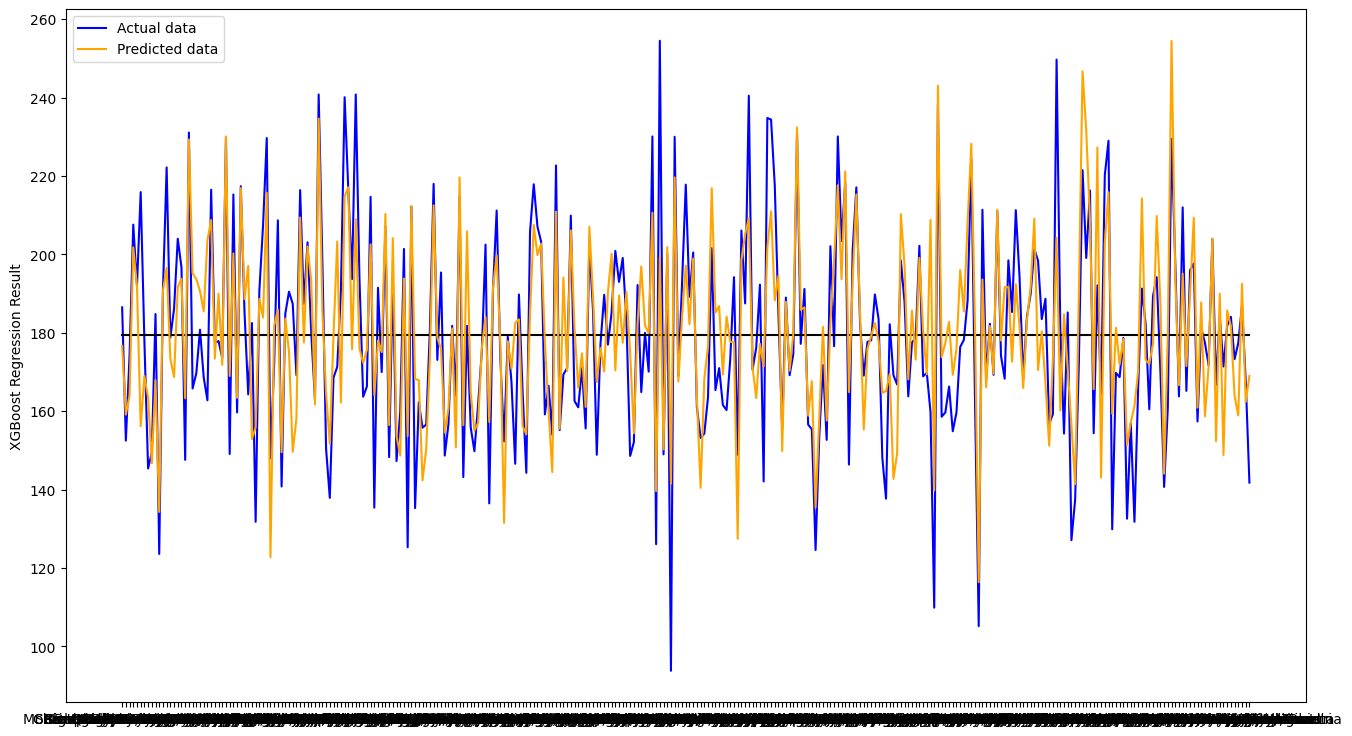

In [50]:
Axis = [y_test_raw.mean()] * len(y_test_raw)
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_test_raw, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(pred, 'orange', label='Predicted data')
plt.legend()

# Predict Feature Selection After Training

In [51]:
cols_threshold = []
for i in importance_df.index:
  if abs(importance_df._get_value(i, 'shap_importance')) > 0.1:
    print(importance_df._get_value(i, 'column_name'))
    cols_threshold.append(importance_df._get_value(i, 'column_name'))

avgAnnCount
PctPrivateCoverage
PctMarriedHouseholds
MedianAgeFemale
medIncome
povertyPercent
MedianAgeMale
MedianAge
popEst2015
incidenceRate
avgDeathsPerYear
PctBachDeg25_Over
PctHS18_24


In [52]:
X_train_fs = trainvalset_raw[cols_threshold]
X_train_fs.head(5)

,avgAnnCount,PctPrivateCoverage,PctMarriedHouseholds,MedianAgeFemale,medIncome,povertyPercent,MedianAgeMale,MedianAge,popEst2015,incidenceRate,avgDeathsPerYear,PctBachDeg25_Over,PctHS18_24
Geography,,,,,,,,,,,,,
"Cumberland County, Maine",1192.5,74.3,47.825159,43.3,61436,10.8,40.3,41.9,153227.875,479.600000,329.875,26.15,24.3
"Perry County, Kentucky",192.0,48.3,50.803249,41.8,31265,27.5,40.2,41.4,27565.000,570.787500,93.000,7.30,35.5
"Camden County, New Jersey",1192.5,68.3,45.973960,40.1,61685,13.0,36.6,38.3,153227.875,530.900000,329.875,19.40,33.2
"Pinal County, Arizona",1192.5,61.6,54.212024,38.5,49876,17.6,36.9,37.6,153227.875,330.900000,329.875,11.70,36.3
"Washington County, Kansas",1192.5,74.4,57.330057,48.4,43264,10.8,44.1,46.3,5598.000,453.549422,18.000,13.20,19.9


In [53]:
X_test_fs = testset_raw[cols_threshold]
X_test_fs.head(5)

,avgAnnCount,PctPrivateCoverage,PctMarriedHouseholds,MedianAgeFemale,medIncome,povertyPercent,MedianAgeMale,MedianAge,popEst2015,incidenceRate,avgDeathsPerYear,PctBachDeg25_Over,PctHS18_24
Geography,,,,,,,,,,,,,
"Linn County, Oregon",675.0,62.3,51.807095,40.40,44358,19.1,38.8,39.50,120547.0,477.4,273,12.0,34.5
"Champaign County, Illinois",781.0,77.3,39.728702,30.70,47966,22.6,28.2,29.30,169831.5,450.2,267,22.3,14.3
"Saratoga County, New York",1113.5,82.6,52.770765,42.90,71885,7.2,40.9,41.80,169831.5,508.7,354,23.0,26.0
"Montmorency County, Michigan",88.0,60.8,49.213759,54.45,37961,15.7,50.7,52.35,9259.0,484.4,37,6.8,26.3
"Barrow County, Georgia",281.0,62.1,55.195246,36.20,49698,13.0,32.9,34.80,75370.0,457.7,114,11.5,38.3


In [54]:
if best_fit_model["model"].values[0] =="Neural Network":
  fs_mod = load_model(f'link_mod ')
else:
  fs_mod = pickle.load(open(link_mod , 'rb'))

In [55]:
if best_fit_model["model"].values[0] =="Neural Network":
  fs_mod = fs_mod.fit(
                    X_train_fs, y_trainval_raw,
                    batch_size=16,
                    epochs=300,
                    validation_split=0.2,
                    verbose=1,
  )
else:
  fs_mod = fs_mod.fit(X_train_fs,y_trainval_raw) 

In [56]:
fs_pred = fs_mod.predict(X_test_fs)

# Result Feature Selection After Training

<Axes: xlabel='Deviation', ylabel='Density'>

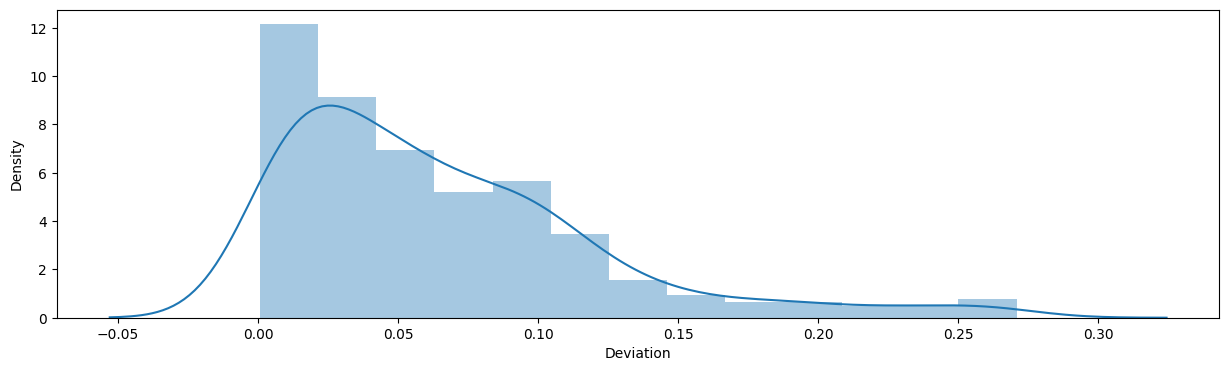

In [57]:
fs_deviation_test = deviation_function(y_test_raw, fs_pred)
dict = {'Actual':y_test_raw,
        'Predict': pred,
        'Deviation':fs_deviation_test}
fs_mod_deviation = pd.DataFrame(dict)
plt.figure(figsize=(15,4))
sns.distplot(fs_mod_deviation.Deviation, label=str(np.round(fs_mod_deviation.Deviation,2)))

In [58]:
#evaluating the model with the following metrics
#mean squared error
fs_mse=mean_squared_error(y_test_raw, fs_pred)     
#mean absolute error     
fs_mae=mean_absolute_error(y_test_raw, fs_pred)  
#root mean squared error      
fs_rmse=np.sqrt(mean_squared_error(y_test_raw, fs_pred))
#r2 score
fs_r2 = r2_score(y_test_raw, fs_pred)
print(f'mse: {fs_mse}')
print(f'mae: {fs_mae}')
print(f'rmse: {fs_rmse}')
print(f"r2_score: {fs_r2}")

mse: 215.3737119008541
mae: 11.322101350377816
rmse: 14.675616235812862
r2_score: 0.7053407556915187


In [59]:
fs_evaluation_df =pd.DataFrame({"mse": fs_mse,"mae": fs_mae,"rmse": fs_rmse,  "r2": fs_r2, "deviation": deviation_value(y_test_raw, fs_pred)},index=['XGBoost Regression'])
fs_evaluation_df

,mse,mae,rmse,r2,deviation
XGBoost Regression,215.373712,11.322101,14.675616,0.705341,0.065177


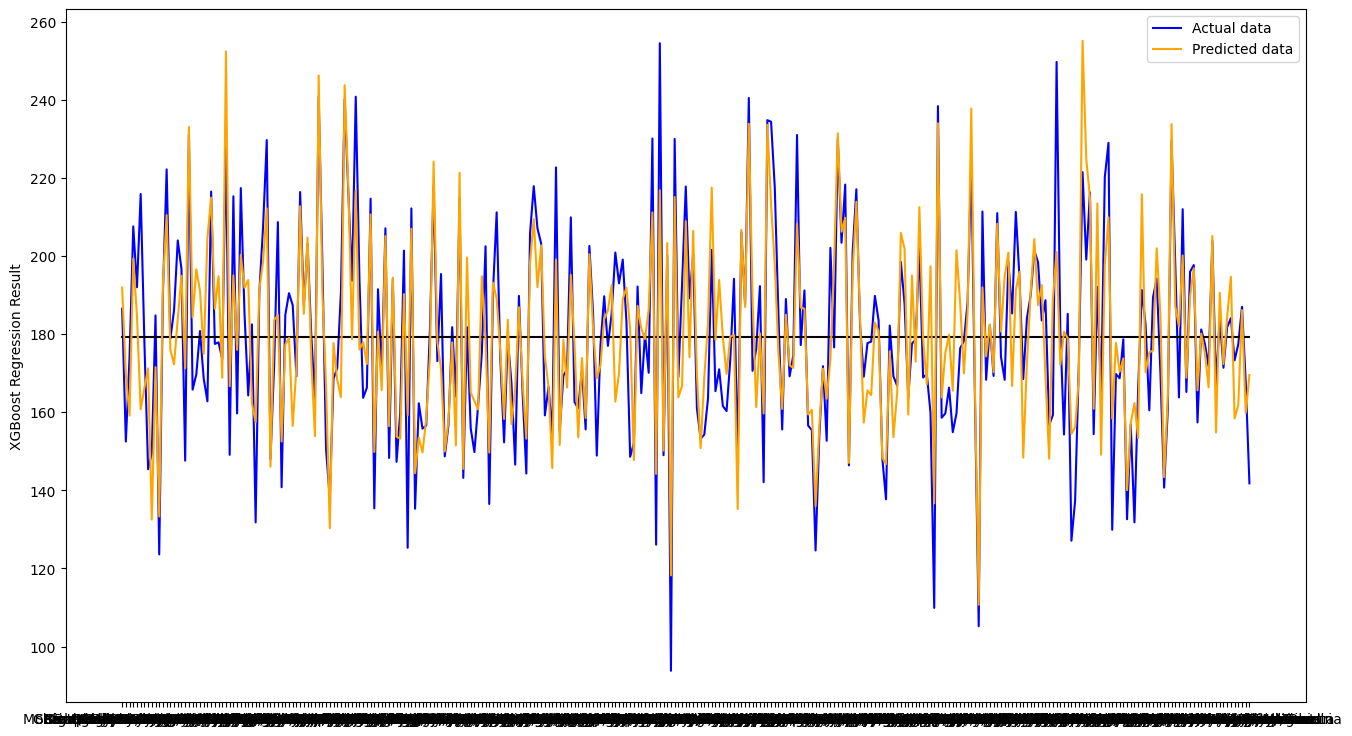

In [60]:
Axis = [y_test_raw.mean()] * len(y_test_raw)
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_test_raw, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(fs_pred, 'orange', label='Predicted data')
plt.legend()

In [61]:
fs_mod_deviation.to_csv("compare_raw_fs.csv")
mod_deviation.to_csv("compare_raw_full.csv")